In [1]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [4]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold

In [5]:
from sklearn.model_selection import StratifiedKFold
from dateutil.relativedelta import relativedelta
import gc

In [2]:
train_bank = pd.read_csv('./train_public.csv')
train_internet = pd.read_csv('./train_internet.csv')

In [28]:
folds = KFold(n_splits=10, shuffle=True, random_state=546689)

In [29]:
a  = folds.split(train_bank)

In [30]:
for n_fold, (train_index, val_index) in enumerate(a):
    traindata= train_bank.iloc[train_index]
    valdate = train_bank.iloc[val_index]

In [31]:
traindata

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,0
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,0
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,0
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,0
5,1047529,247529,25454.54545,3,10.637,899.15,B,幼教与中小学校,信息传输、软件和信息技术服务业,10+ years,...,1,6.0,0.0,6.0,20.0,15.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1028093,228093,17727.27273,3,15.037,510.27,B,普通企业,建筑业,7 years,...,1,4.0,0.0,4.0,11.0,7.0,2,5287,0.0,0
9996,1043911,243911,13636.36364,3,6.534,464.95,A,政府机构,农、林、牧、渔业,2 years,...,1,2.0,0.0,2.0,7.0,6.0,3,7182,0.0,0
9997,1023503,223503,24818.18182,3,14.421,708.69,B,普通企业,信息传输、软件和信息技术服务业,10+ years,...,1,6.0,0.0,5.0,15.0,11.0,1,8540,2562.0,0
9998,1024616,224616,20000.00000,3,18.450,727.58,D,政府机构,农、林、牧、渔业,10+ years,...,1,7.0,0.0,5.0,17.0,10.0,2,6161,616.1,0


In [3]:
train_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   10000 non-null  int64  
 1   user_id                   10000 non-null  int64  
 2   total_loan                10000 non-null  float64
 3   year_of_loan              10000 non-null  int64  
 4   interest                  10000 non-null  float64
 5   monthly_payment           10000 non-null  float64
 6   class                     10000 non-null  object 
 7   employer_type             10000 non-null  object 
 8   industry                  10000 non-null  object 
 9   work_year                 9378 non-null   object 
 10  house_exist               10000 non-null  int64  
 11  censor_status             10000 non-null  int64  
 12  issue_date                10000 non-null  object 
 13  use                       10000 non-null  int64  
 14  post_co

In [4]:
train_bank.count().values

array([10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
        9378, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
       10000, 10000, 10000, 10000,  9993, 10000, 10000, 10000, 10000,
       10000, 10000, 10000,  9502,  9142,  9502,  9502,  9502, 10000,
       10000, 10000, 10000], dtype=int64)

In [4]:
train_internet["is_default"].value_counts()

0    600327
1    149673
Name: is_default, dtype: int64

In [5]:
train_bank["isDefault"].value_counts()

0    8317
1    1683
Name: isDefault, dtype: int64

In [5]:
test = pd.read_csv('./test_public.csv')

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   5000 non-null   int64  
 1   user_id                   5000 non-null   int64  
 2   total_loan                5000 non-null   float64
 3   year_of_loan              5000 non-null   int64  
 4   interest                  5000 non-null   float64
 5   monthly_payment           5000 non-null   float64
 6   class                     5000 non-null   object 
 7   employer_type             5000 non-null   object 
 8   industry                  5000 non-null   object 
 9   work_year                 4722 non-null   object 
 10  house_exist               5000 non-null   int64  
 11  censor_status             5000 non-null   int64  
 12  issue_date                5000 non-null   object 
 13  use                       5000 non-null   int64  
 14  post_cod

In [7]:

tmp  = train_internet["total_loan"].reshape(-1,1)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
tmp1 = stdsc.fit_transform(tmp)

AttributeError: 'Series' object has no attribute 'reshape'

In [4]:
def countnum (data):
    tmp = pd.DataFrame()
    tmp["count"] = data[list(data.columns)].count().values
    tmp["missingnum"] = data.shape[0] - tmp["count"]
    tmp["missingrate"] = 100*(data.shape[0] - tmp["count"])/data.shape[0]
    tmp.index = list(data.columns)
    return tmp

In [6]:
countnum(train_bank)

,count,missingnum,missingrate
loan_id,10000,0,0.00
user_id,10000,0,0.00
total_loan,10000,0,0.00
year_of_loan,10000,0,0.00
interest,10000,0,0.00
monthly_payment,10000,0,0.00
class,10000,0,0.00
employer_type,10000,0,0.00
industry,10000,0,0.00
work_year,9378,622,6.22


In [7]:
countnum(train_internet)

,count,missingnum,missingrate
loan_id,750000,0,0.000000
user_id,750000,0,0.000000
total_loan,750000,0,0.000000
year_of_loan,750000,0,0.000000
interest,750000,0,0.000000
monthly_payment,750000,0,0.000000
class,750000,0,0.000000
sub_class,750000,0,0.000000
work_type,750000,0,0.000000
employer_type,750000,0,0.000000


In [44]:
countnum(test)

,count,missingnum,missingrate
loan_id,5000,0,0.00
user_id,5000,0,0.00
total_loan,5000,0,0.00
year_of_loan,5000,0,0.00
interest,5000,0,0.00
monthly_payment,5000,0,0.00
class,5000,0,0.00
employer_type,5000,0,0.00
industry,5000,0,0.00
work_year,4722,278,5.56


### 数据预处理

In [15]:
common_cols = []
for col in train_bank.columns:
    if col in train_internet.columns:
        common_cols.append(col)
    else: continue
len(common_cols)

35

In [17]:
print(len(train_bank.columns))
print(len(train_internet.columns))
print(len(test.columns))

39
42
38


In [28]:
train_bank_left = list(set(list(train_bank.columns)) - set(common_cols))
train_internet_left = list(set(list(train_internet.columns)) - set(common_cols))
test_left = list(set(list(test.columns)) - set(common_cols))
train_bank_left

['app_type', 'known_outstanding_loan', 'known_dero']

In [7]:
train_internet_left

['f5',
 'marriage',
 'house_loan_status',
 'work_type',
 'offsprings',
 'sub_class',
 'is_default']

In [29]:
test_left

['app_type', 'known_outstanding_loan', 'known_dero']

In [17]:
common_cols

['loan_id',
 'user_id',
 'total_loan',
 'year_of_loan',
 'interest',
 'monthly_payment',
 'class',
 'employer_type',
 'industry',
 'work_year',
 'house_exist',
 'censor_status',
 'issue_date',
 'use',
 'post_code',
 'region',
 'debt_loan_ratio',
 'del_in_18month',
 'scoring_low',
 'scoring_high',
 'pub_dero_bankrup',
 'recircle_b',
 'recircle_u',
 'initial_list_status',
 'earlies_credit_mon',
 'title',
 'policy_code',
 'f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'early_return',
 'early_return_amount',
 'early_return_amount_3mon']

In [17]:
train_bank =  train_bank.rename(columns={"isDefault":"is_default"})                       ##修改train_bank 的列名

In [21]:
common_cols = []
for col in train_bank.columns:
    if col in train_internet.columns:
        common_cols.append(col)
    else: continue
len(common_cols)                                                                    #取出共同列

36

In [23]:
common_cols

['loan_id',
 'user_id',
 'total_loan',
 'year_of_loan',
 'interest',
 'monthly_payment',
 'class',
 'employer_type',
 'industry',
 'work_year',
 'house_exist',
 'censor_status',
 'issue_date',
 'use',
 'post_code',
 'region',
 'debt_loan_ratio',
 'del_in_18month',
 'scoring_low',
 'scoring_high',
 'pub_dero_bankrup',
 'recircle_b',
 'recircle_u',
 'initial_list_status',
 'earlies_credit_mon',
 'title',
 'policy_code',
 'f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'early_return',
 'early_return_amount',
 'early_return_amount_3mon',
 'is_default']

In [24]:
train1_data = train_internet[common_cols]
train2_data = train_bank[common_cols]
test_data = test[common_cols[:-1]]

train1_data.columns

# 2.数据可视化

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Feature 1:Total of loan

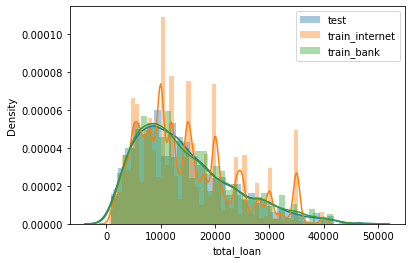

In [32]:
sns.distplot(test["total_loan"],label="test")
sns.distplot(train_internet["total_loan"],label="train_internet")
sns.distplot(train_bank["total_loan"],label="train_bank")
plt.legend()

In [ ]:
tmp  = train_internet["total_loan"]

## Feature 2: year of loan 
## 主要集中在3年和五年

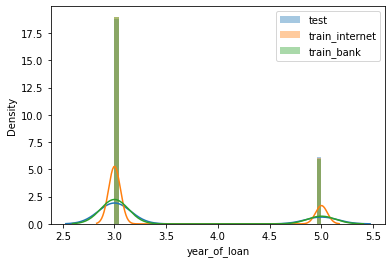

In [40]:
sns.distplot(test["year_of_loan"],label="test")
sns.distplot(train_internet["year_of_loan"],label="train_internet")
sns.distplot(train_bank["year_of_loan"],label="train_bank")
plt.legend()

## Feature 3: interest

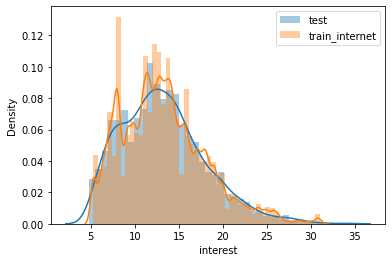

In [43]:
sns.distplot(test["interest"],label="test")
sns.distplot(train_internet["interest"],label="train_internet")
#sns.distplot(train_bank["interest"],label="train_bank")
plt.legend()

In [ ]:
train_bank["interest"]

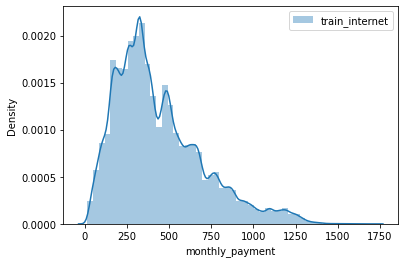

In [89]:
#sns.distplot(test["monthly_payment"],label="test")
sns.distplot(train_internet["monthly_payment"],label="train_internet")
#sns.distplot(train_bank["monthly_payment"],label="train_bank")
plt.legend()

## Feature 4: class

In [78]:
testclass = test["class"].value_counts()
testclass = pd.DataFrame(testclass)
testclass.columns = ["test"]

bankclass = train_bank["class"].value_counts()
bankclass = pd.DataFrame(bankclass)
bankclass.columns = ["bank"]

internetclass = train_internet["class"].value_counts()
internetclass = pd.DataFrame(internetclass)
internetclass.columns = ["internet"]

<AxesSubplot:>

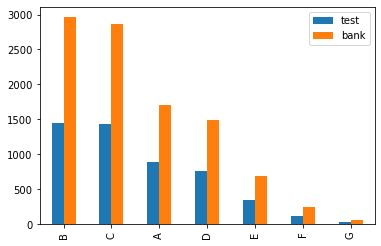

In [86]:
grade = testclass.join(bankclass)
grade.plot.bar()

<AxesSubplot:>

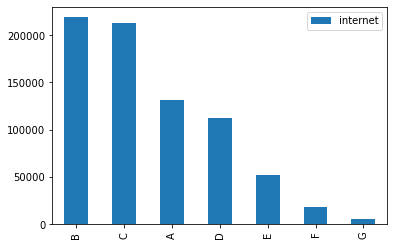

In [88]:
internetclass.plot.bar()

# F5 employment type

In [10]:
testet = test["employer_type"].value_counts()
testet = pd.DataFrame(testet)
testet.columns = ["test"]

banket = train_bank["employer_type"].value_counts()
banket = pd.DataFrame(banket)
banket.columns = ["bank"]

internetet = train_internet["employer_type"].value_counts()
internetet = pd.DataFrame(internetet)
internetet.columns = ["internet"]

<AxesSubplot:>

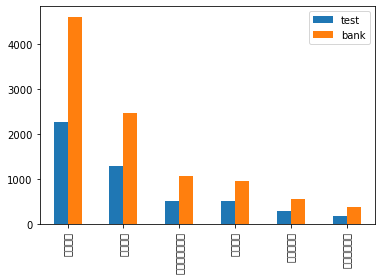

In [11]:
employment_type = testet.join(banket)
employment_type.plot.bar()

<AxesSubplot:>

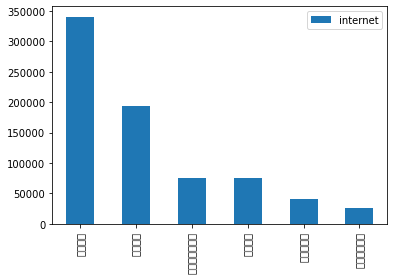

In [12]:
internetet.plot.bar()

# F6 Industry

In [14]:
testindustry = test["industry"].value_counts()
testindustry = pd.DataFrame(testindustry)
testindustry.columns = ["test"]

bankindustry = train_bank["industry"].value_counts()
bankindustry = pd.DataFrame(bankindustry)
bankindustry.columns = ["bank"]

internetindustry = train_internet["industry"].value_counts()
internetindustry = pd.DataFrame(internetindustry)
internetindustry.columns = ["internet"]

<AxesSubplot:>

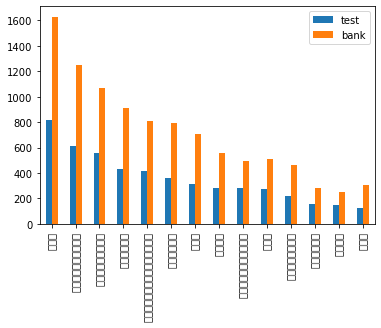

In [15]:
industry = testindustry.join(bankindustry)
industry.plot.bar()

<AxesSubplot:>

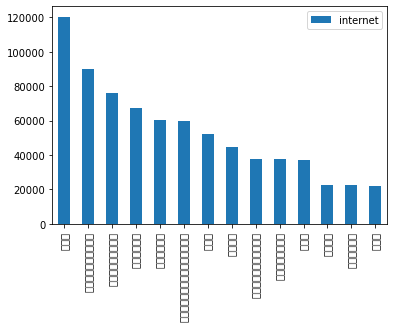

In [16]:
internetindustry.plot.bar()

# F7 work year

In [18]:
work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
     '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}

test["work_year"] = test["work_year"].map(work_year_map)
train_bank["work_year"] = train_bank["work_year"].map(work_year_map)
train_internet["work_year"] = train_internet["work_year"].map(work_year_map)

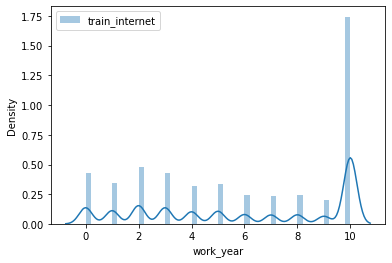

In [22]:
#sns.distplot(test["work_year"],label="test")
sns.distplot(train_internet["work_year"],label="train_internet")
#sns.distplot(train_bank["work_year"],label="train_bank")
plt.legend()

# F8 house exist

<AxesSubplot:>

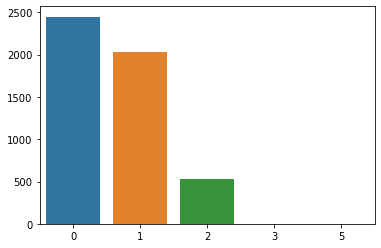

In [31]:
test_house = test["house_exist"].value_counts()
sns.barplot(y=test_house.values,x=test_house.index)

<AxesSubplot:>

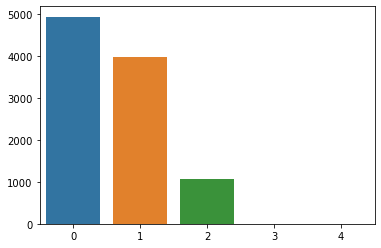

In [32]:
bank_house = train_bank["house_exist"].value_counts()
sns.barplot(y=bank_house.values,x=bank_house.index)

<AxesSubplot:>

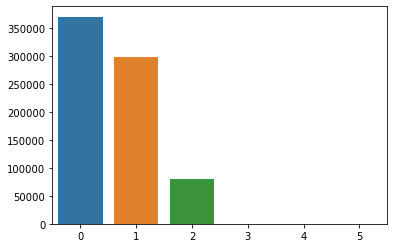

In [33]:
internet_house = train_internet["house_exist"].value_counts()
sns.barplot(y=internet_house.values,x=internet_house.index)

# F9  Censor_status

<AxesSubplot:>

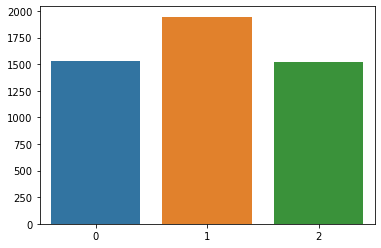

In [34]:
test_censor = test["censor_status"].value_counts()
sns.barplot(y=test_censor.values,x=test_censor.index)

<AxesSubplot:>

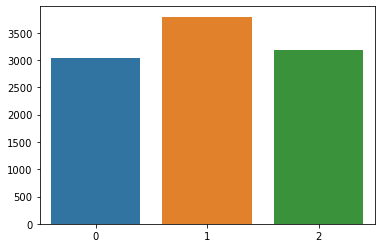

In [35]:
bank_censor = train_bank["censor_status"].value_counts()
sns.barplot(y=bank_censor.values,x=bank_censor.index)

<AxesSubplot:>

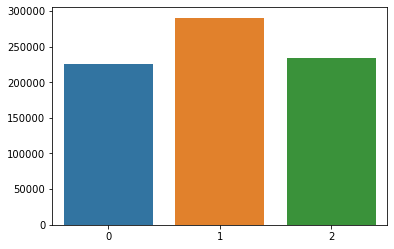

In [36]:
internet_censor = train_internet["censor_status"].value_counts()
sns.barplot(y=internet_censor.values,x=internet_censor.index)

# F10 USE 贷款用途

<AxesSubplot:>

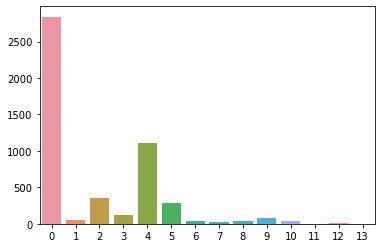

In [37]:
test_use = test["use"].value_counts()
sns.barplot(y=test_use.values,x=test_use.index)

<AxesSubplot:>

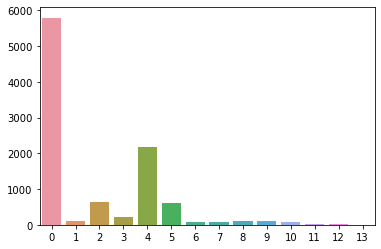

In [39]:
bank_use = train_bank["use"].value_counts()
sns.barplot(y=bank_use.values,x=bank_use.index)

<AxesSubplot:>

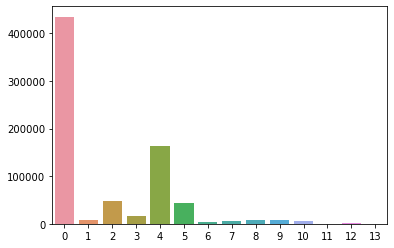

In [42]:
internet_use = train_internet["use"].value_counts()
sns.barplot(y=internet_use.values,x=internet_use.index)

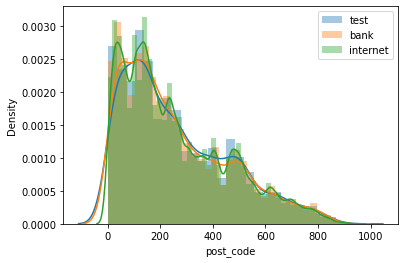

In [54]:
sns.distplot(test["post_code"],label="test")
sns.distplot(train_bank["post_code"],label="bank")
sns.distplot(train_internet["post_code"],label="internet")
plt.legend()

# F11 region

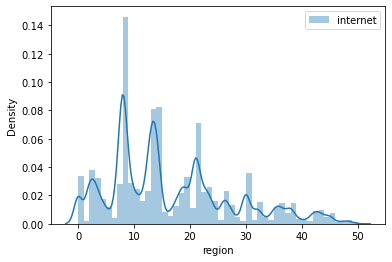

In [58]:
#sns.distplot(test["region"],label="test")
#sns.distplot(train_bank["region"],label="bank")
sns.distplot(train_internet["region"],label="internet")
plt.legend()

# F12 debt_loan_ratio 
# !!!outliers in train_internet

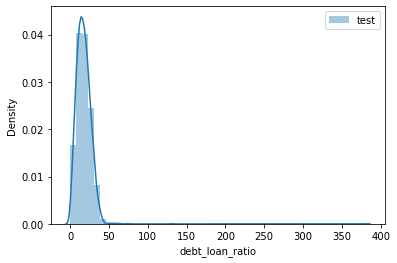

In [147]:
sns.distplot(test["debt_loan_ratio"],label="test")
#sns.distplot(train_bank["debt_loan_ratio"],label="bank")
plt.legend()

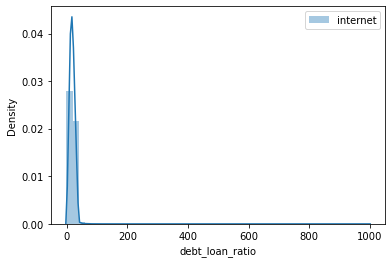

In [66]:
#sns.distplot(test["debt_loan_ratio"],label="test")
#sns.distplot(train_bank["debt_loan_ratio"],label="bank")
sns.distplot(train_internet["debt_loan_ratio"],label="internet")
plt.legend()

In [143]:
train_internet["debt_loan_ratio"].value_counts()

19.20     562
18.00     556
13.20     544
16.80     530
14.40     508
         ... 
94.72       1
60.15       1
71.50       1
63.11       1
124.71      1
Name: debt_loan_ratio, Length: 6212, dtype: int64

# F13 DEL_IN_18MONTH

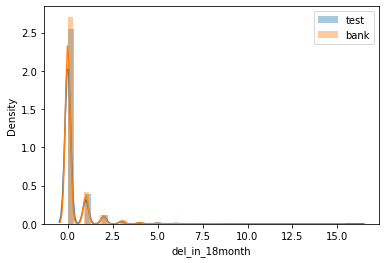

In [74]:
sns.distplot(test["del_in_18month"],label="test")
sns.distplot(train_bank["del_in_18month"],label="bank")
#sns.distplot(train_internet["del_in_18month"],label="internet")
plt.legend()

<AxesSubplot:xlabel='del_in_18month', ylabel='Density'>

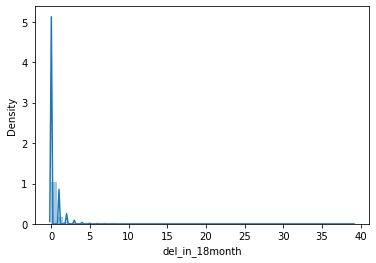

In [75]:
sns.distplot(train_internet["del_in_18month"],label="internet")

# F14  scoring_low   !!different distribution

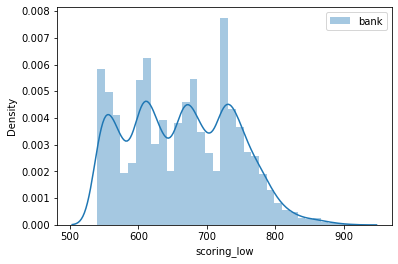

In [149]:
#sns.distplot(test["scoring_low"],label="test")
sns.distplot(train_bank["scoring_low"],label="bank")
plt.legend()

<AxesSubplot:xlabel='scoring_low', ylabel='Density'>

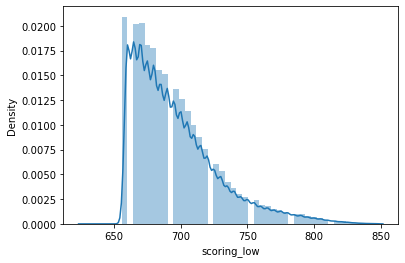

In [80]:
sns.distplot(train_internet["scoring_low"],label="internet")

# F15  scoring_high

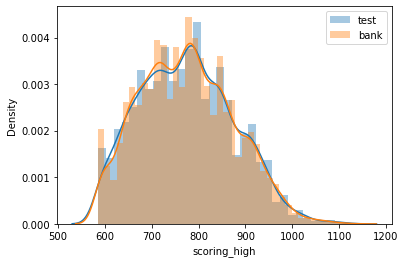

In [81]:
sns.distplot(test["scoring_high"],label="test")
sns.distplot(train_bank["scoring_high"],label="bank")
plt.legend()

<AxesSubplot:xlabel='scoring_high', ylabel='Density'>

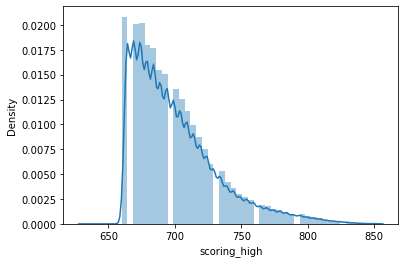

In [84]:
sns.distplot(train_internet["scoring_high"],label="internet")

# F16 known_outstanding_loan    

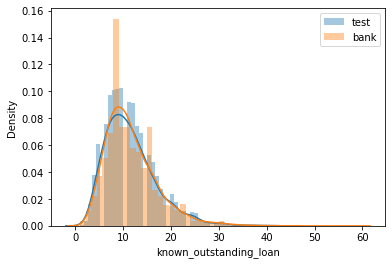

In [85]:
sns.distplot(test["known_outstanding_loan"],label="test")
sns.distplot(train_bank["known_outstanding_loan"],label="bank")
plt.legend()

# F17 known_dero

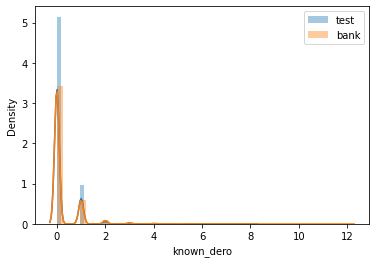

In [88]:
sns.distplot(test["known_dero"],label="test")
sns.distplot(train_bank["known_dero"],label="bank")
plt.legend()

# F18 pub_dero_bankrup
# 公开记录清除的数量 
# 可能存在outlier

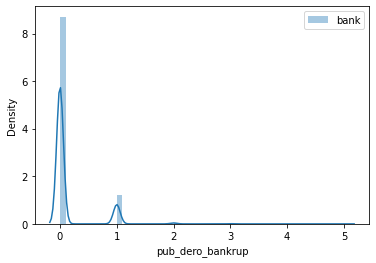

In [151]:
#sns.distplot(test["pub_dero_bankrup"],label="test")
sns.distplot(train_bank["pub_dero_bankrup"],label="bank")
plt.legend()

<AxesSubplot:xlabel='pub_dero_bankrup', ylabel='Density'>

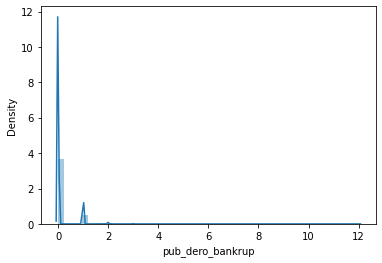

In [91]:
sns.distplot(train_internet["pub_dero_bankrup"],label="bank")

In [94]:
train_internet["pub_dero_bankrup"].value_counts()

0.0     656470
1.0      87630
2.0       4297
3.0        880
4.0        231
5.0         76
6.0         23
7.0         11
8.0          3
9.0          3
12.0         1
Name: pub_dero_bankrup, dtype: int64

# F19 recircle_b
# 信贷周转余额合计

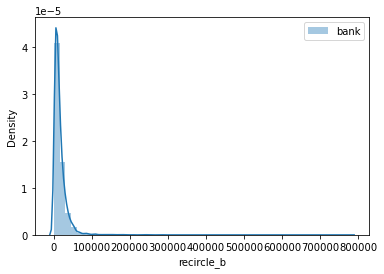

In [153]:
#sns.distplot(test["recircle_b"],label="test")
sns.distplot(train_bank["recircle_b"],label="bank")
plt.legend()

<AxesSubplot:xlabel='recircle_b', ylabel='Density'>

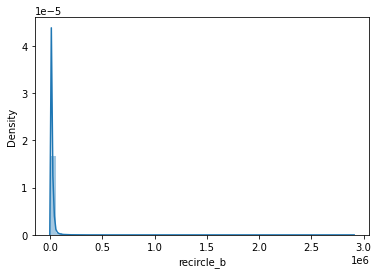

In [96]:
sns.distplot(train_internet["recircle_b"],label="internet")

# F20  recircle_u
# 循环额度利用率
# 有outlier

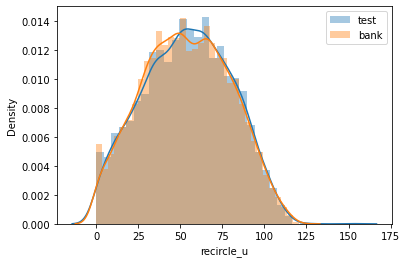

In [99]:
sns.distplot(test["recircle_u"],label="test")
sns.distplot(train_bank["recircle_u"],label="bank")
plt.legend()

<AxesSubplot:xlabel='recircle_u', ylabel='Density'>

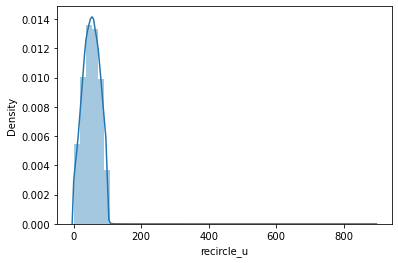

In [100]:
sns.distplot(train_internet["recircle_u"],label="bank")

# F21 initial_list_status
# 贷款的初始列表状态

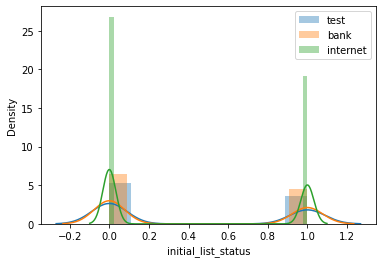

In [106]:
sns.distplot(test["initial_list_status"],label="test")
sns.distplot(train_bank["initial_list_status"],label="bank")
sns.distplot(train_internet["initial_list_status"],label="internet")
plt.legend()

# F22 app_type
# 是否个人申请

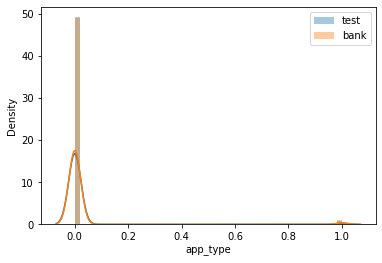

In [107]:
sns.distplot(test["app_type"],label="test")
sns.distplot(train_bank["app_type"],label="bank")
plt.legend()

# F23 title
# 借款人提供的贷款名称

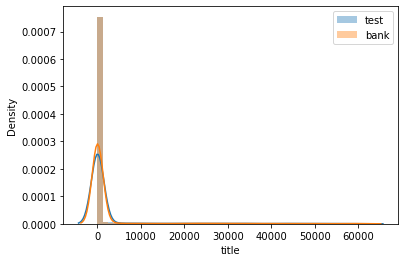

In [111]:
sns.distplot(test["title"],label="test")
sns.distplot(train_bank["title"],label="bank")
plt.legend()

<AxesSubplot:xlabel='title', ylabel='Density'>

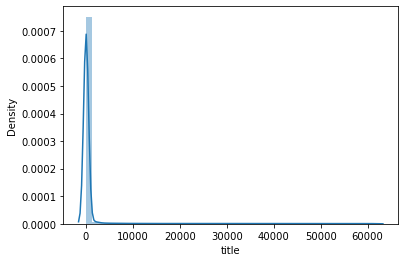

In [112]:
sns.distplot(train_internet["title"],label="internet")

# F24 policy_code
# 公开策略=1不公开策略=2
# 都一样 都是1

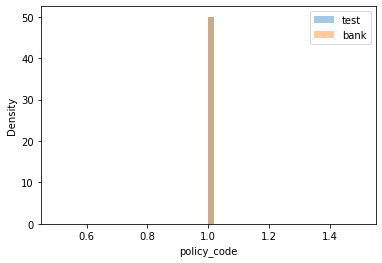

In [115]:
sns.distplot(test["policy_code"],label="test")
sns.distplot(train_bank["policy_code"],label="bank")
plt.legend()

In [118]:
train_internet["policy_code"].value_counts()

1.0    750000
Name: policy_code, dtype: int64

# F25 匿名特征 f0

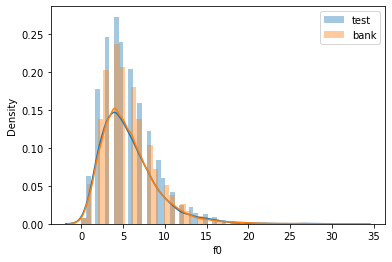

In [122]:
sns.distplot(test["f0"],label="test")
sns.distplot(train_bank["f0"],label="bank")
plt.legend()

<AxesSubplot:xlabel='f0', ylabel='Density'>

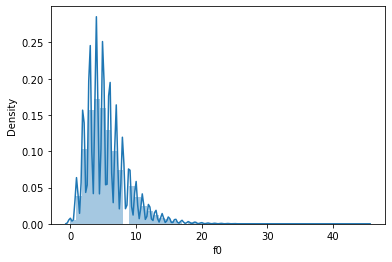

In [123]:
sns.distplot(train_internet["f0"],label="internet")

# F26 匿名特征 f1
# internet 有outlier

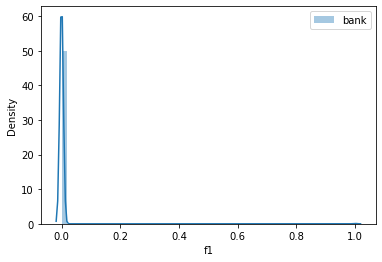

In [155]:
#sns.distplot(test["f1"],label="test")
sns.distplot(train_bank["f1"],label="bank")
plt.legend()

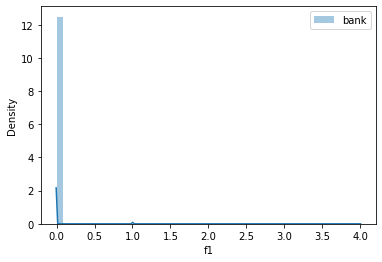

In [125]:
sns.distplot(train_internet["f1"],label="internet")
plt.legend()

In [127]:
train_internet["f1"].value_counts()

0.0    684067
1.0       496
2.0        24
3.0         1
4.0         1
Name: f1, dtype: int64

# F26 匿名特征 f2    iner

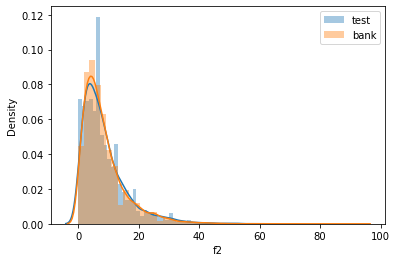

In [128]:
sns.distplot(test["f2"],label="test")
sns.distplot(train_bank["f2"],label="bank")
plt.legend()

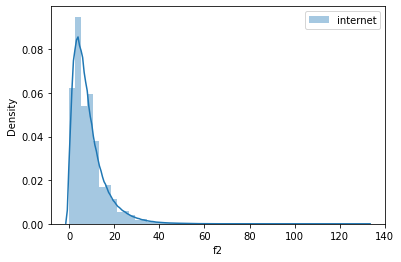

In [129]:
sns.distplot(train_internet["f2"],label="internet")
plt.legend()

# F26 匿名特征 f3  ineter

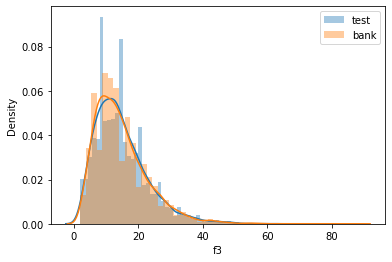

In [130]:
sns.distplot(test["f3"],label="test")
sns.distplot(train_bank["f3"],label="bank")
plt.legend()

<AxesSubplot:xlabel='f3', ylabel='Density'>

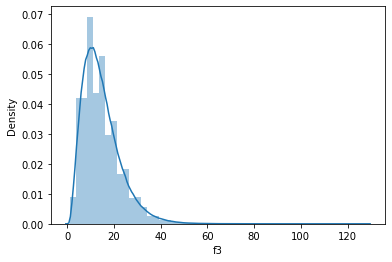

In [131]:
sns.distplot(train_internet["f3"],label="internet")

# F27 匿名特征 f4 

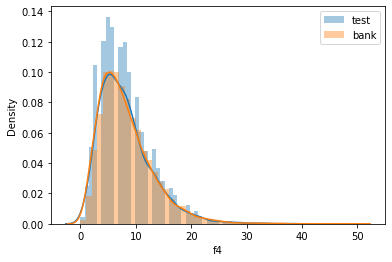

In [132]:
sns.distplot(test["f4"],label="test")
sns.distplot(train_bank["f4"],label="bank")
plt.legend()

<AxesSubplot:xlabel='f4', ylabel='Density'>

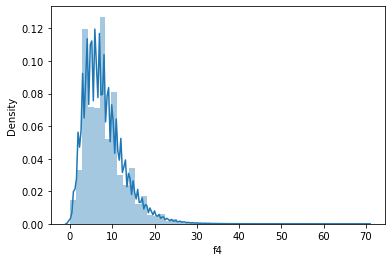

In [133]:
sns.distplot(train_internet["f4"],label="internet")

# F28 匿名特征 f5 
# 只有Internet 有

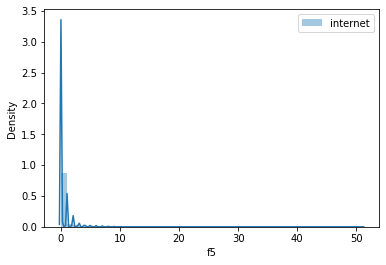

In [136]:
sns.distplot(train_internet["f5"],label="internet")
plt.legend()

# F29 early_return 借款人提前还款次数

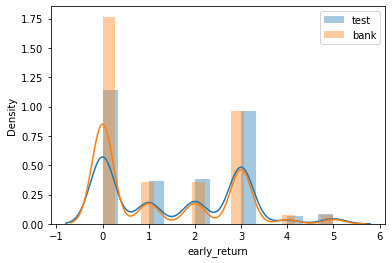

In [137]:
sns.distplot(test["early_return"],label="test")
sns.distplot(train_bank["early_return"],label="bank")
plt.legend()

# F30 early_return_amount 贷款人提前还款累积金额

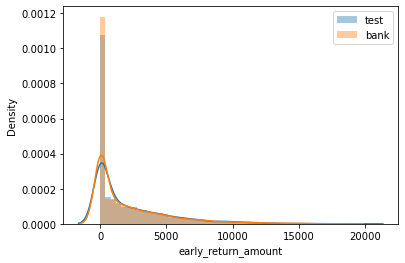

In [138]:
sns.distplot(test["early_return_amount"],label="test")
sns.distplot(train_bank["early_return_amount"],label="bank")
plt.legend()

# F31 early_return_amount_3mon 近3个月内提前还款金额

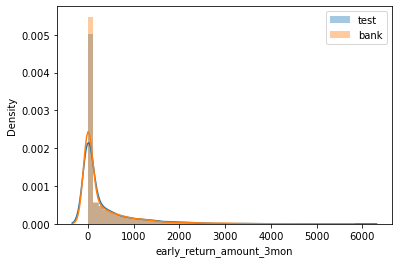

In [139]:
sns.distplot(test["early_return_amount_3mon"],label="test")
sns.distplot(train_bank["early_return_amount_3mon"],label="bank")
plt.legend()